# Analyze the data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

In [19]:
df = pd.read_csv("data/data_clean.csv", index_col=0, parse_dates=[2])
df.head()

,customer_no,timestamp,location
0,10001,2019-09-02 07:02:00,entrance
1,10001,2019-09-02 07:03:00,dairy
2,10001,2019-09-02 07:04:00,dairy
3,10001,2019-09-02 07:05:00,checkout
4,10002,2019-09-02 07:02:00,entrance


### Calculate the total number of customers in each section

In [4]:
df_plot = df.groupby("location")[["customer_no"]].count()
df_plot

,customer_no
location,
checkout,7445
dairy,17774
drinks,9726
entrance,7445
fruit,12708
spices,6278


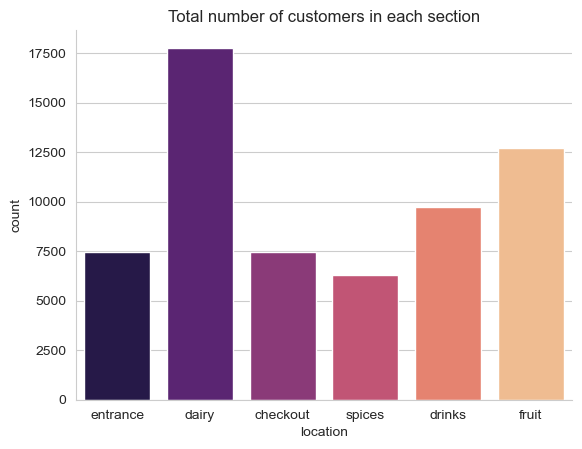

In [5]:
sns.countplot(x="location", data=df, palette="magma")
plt.title("Total number of customers in each section")
sns.despine()
plt.show();



### Calculate the total number of customers in each section over time


In [6]:
location_by_hour = (
    df.set_index("timestamp")
    .groupby("location")[["customer_no"]]
    .resample("H")
    .count()
    .reset_index()
    .set_index("timestamp")
)
location_by_hour.tail()

,location,customer_no
timestamp,,
2019-09-06 17:00:00,spices,100
2019-09-06 18:00:00,spices,140
2019-09-06 19:00:00,spices,106
2019-09-06 20:00:00,spices,105
2019-09-06 21:00:00,spices,37


In [7]:
px.line(
    location_by_hour,
    x=location_by_hour.index,
    y="customer_no",
    color="location",
    title="Number of customers in each section by hour",
)

In [8]:
location_by_day = (
    df.set_index("timestamp")
    .groupby("location")[["customer_no"]]
    .resample("D")
    .count()
    .reset_index()
    .set_index("timestamp")
)
location_by_day.head()

,location,customer_no
timestamp,,
2019-09-02,checkout,1447
2019-09-03,checkout,1422
2019-09-04,checkout,1531
2019-09-05,checkout,1535
2019-09-06,checkout,1510


In [9]:
px.line(
    location_by_day,
    x=location_by_day.index,
    y="customer_no",
    color="location",
    title="Number of customers in each section by day",
    template="simple_white",
)


### Display the number of customers at checkout over time


In [20]:
checkout_by_hour = (
    df[df["location"] == "checkout"]
    .set_index("timestamp")
    .resample("H")
    .count()
    .reset_index()
    .set_index("timestamp")
)
checkout_by_hour.head()

,customer_no,location
timestamp,,
2019-09-02 07:00:00,92,92
2019-09-02 08:00:00,112,112
2019-09-02 09:00:00,85,85
2019-09-02 10:00:00,90,90
2019-09-02 11:00:00,55,55


In [11]:
px.line(
    checkout_by_hour,
    x=checkout_by_hour.index,
    y="customer_no",
    title="Customers at checkout by hour",
    template="simple_white",
)


### Calculate the time each customer spent in the market


In [12]:
# Calculate the time each customer spends in the supermarket (in minutes)
customer_min_max_time = df.groupby("customer_no")[["timestamp"]].agg([min, max]).reset_index()
customer_min_max_time.columns = customer_min_max_time.columns.droplevel(0)
customer_min_max_time["time"] = (customer_min_max_time["max"] - customer_min_max_time["min"]).astype('timedelta64[m]')
customer_min_max_time.head()

,,min,max,time
0,10001,2019-09-02 07:02:00,2019-09-02 07:05:00,3.0
1,10002,2019-09-02 07:02:00,2019-09-02 07:06:00,4.0
2,10003,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0
3,10004,2019-09-02 07:03:00,2019-09-02 07:08:00,5.0
4,10005,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0


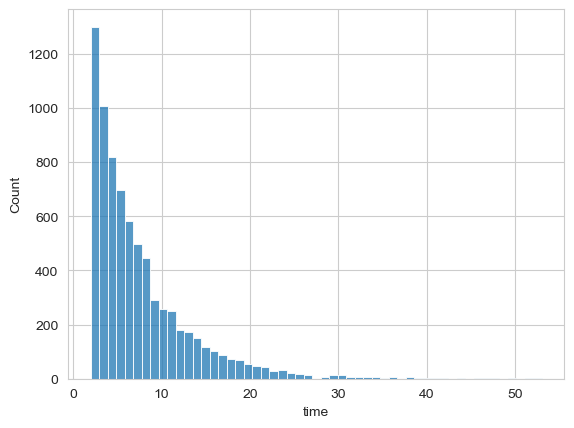

In [13]:
sns.histplot(data=customer_min_max_time, x="time", bins=int(customer_min_max_time["time"].max()));


### Calculate the total number of customers in the supermarket over time.


In [14]:
customers_by_hour = (
    df.set_index("timestamp")[["customer_no"]]
    .resample("H")
    .count()
    .reset_index()
    .set_index("timestamp")
)
customers_by_hour.tail()

,customer_no
timestamp,
2019-09-06 17:00:00,984
2019-09-06 18:00:00,1331
2019-09-06 19:00:00,1133
2019-09-06 20:00:00,802
2019-09-06 21:00:00,407


In [15]:
px.line(
    customers_by_hour,
    x=customers_by_hour.index,
    y="customer_no",
    title="Total number of customers in the store (by hour)",
    template="simple_white",
)


### Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).


In [16]:
# Remove entrance and checkout
df_sections = df[df["location"].isin(["dairy", "drinks", "fruit", "spices"])]

# Get first section
first_section = df_sections.groupby("customer_no").first().reset_index().copy()

# Get all others
following_sections = df_sections[~df_sections.index.isin(first_section.index)]

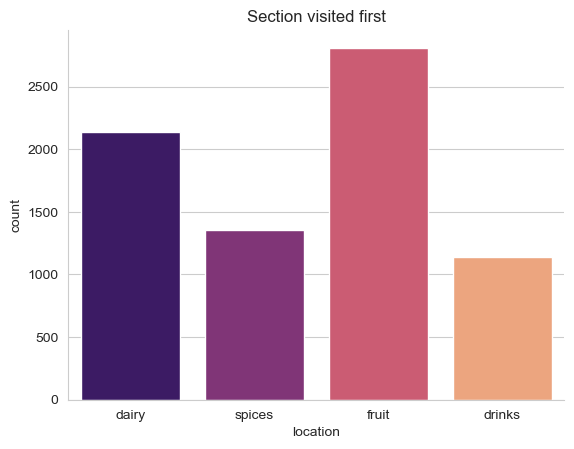

In [17]:
sns.countplot(
    x="location",
    data=first_section,
    palette="magma",
    order=["dairy", "spices", "fruit", "drinks"],
)
plt.title("Section visited first")
sns.despine()
plt.show()

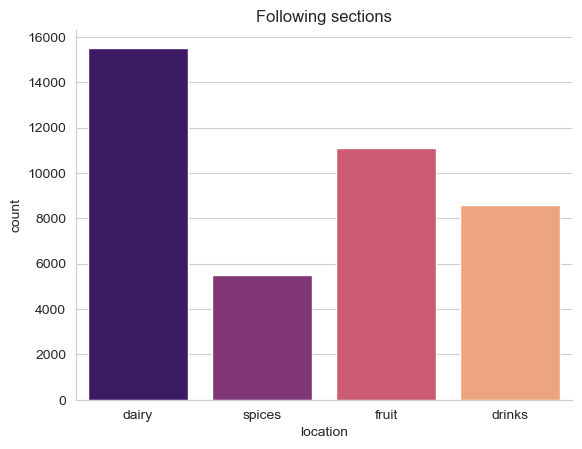

In [18]:
sns.countplot(
    x="location",
    data=following_sections,
    palette="magma",
    order=["dairy", "spices", "fruit", "drinks"],
)
plt.title("Following sections")
sns.despine()
plt.show()